In [4]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import warnings


Loading the data sets

In [5]:
dataset = pandas.read_csv('layers.csv')
print(dataset.head())
print(dataset.columns)

   layers  atempt                                         train_loss  \
0       1       0  [3.2514168548583986, 3.130403869628906, 3.0979...   
1       1       1  [3.248278518676758, 3.1379422266483306, 3.1082...   
2       1       2  [3.2652645225524903, 3.1369180991649626, 3.097...   
3       1       3  [3.242722779035568, 3.125573392629623, 3.09952...   
4       1       4  [3.277780510663986, 3.1528806200027466, 3.1083...   

   validation_loss        validation_test  generalisation_x2  \
0         2.999415  (0.999, 0.987, 0.039)  (0.004, 0.0, 0.0)   
1         3.002231  (0.998, 0.988, 0.044)    (0.0, 0.0, 0.0)   
2         3.000518   (0.995, 0.99, 0.047)    (0.0, 0.0, 0.0)   
3         3.002053  (0.996, 0.991, 0.035)    (0.0, 0.0, 0.0)   
4         3.028999  (0.981, 0.965, 0.033)  (0.001, 0.0, 0.0)   

   generalisation_x4  
0  (0.001, 0.0, 0.0)  
1    (0.0, 0.0, 0.0)  
2    (0.0, 0.0, 0.0)  
3    (0.0, 0.0, 0.0)  
4    (0.0, 0.0, 0.0)  
Index(['layers', 'atempt', 'train_loss', 'va

Creating functions to plot the data 

C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\3280634829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_loss[i] = training_loss[i].replace('[','').replace(']','').split(',')
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\3280634829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_loss[i] = [float(x) for x in training_loss[i]]
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\3280634829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

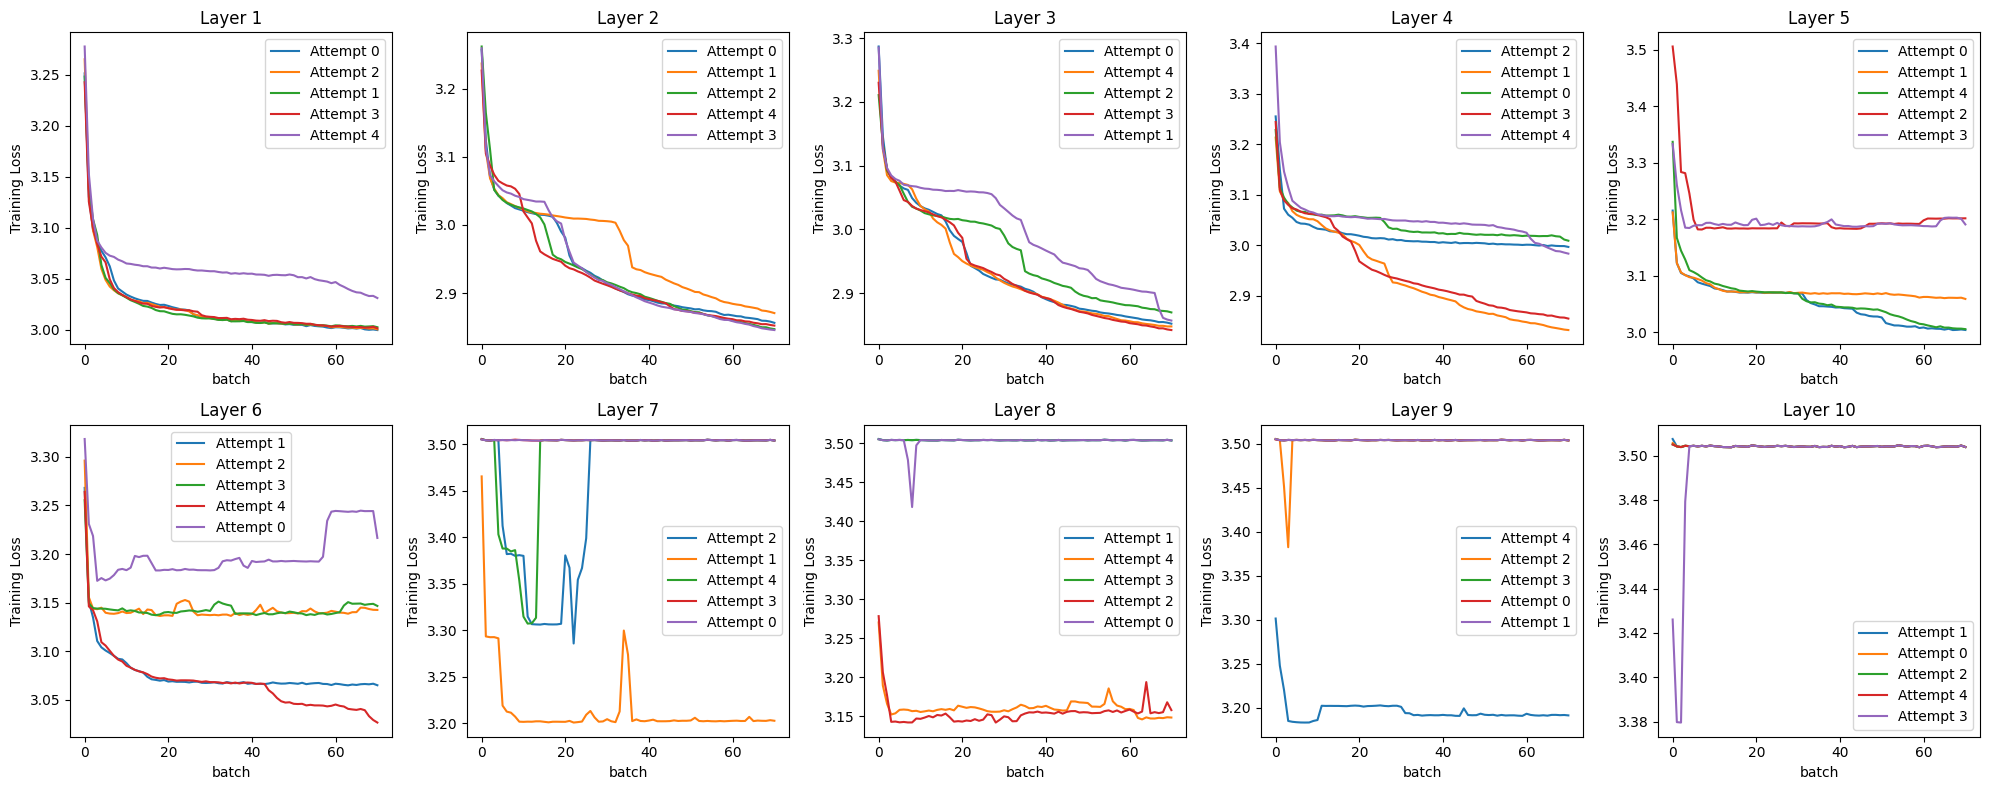

In [6]:
def plot_train_loss_by_layer(dataset):
    # Process training loss data
    dataset =dataset.copy()
    training_loss = dataset['train_loss']
    for i in range(len(training_loss)):
        training_loss[i] = training_loss[i].replace('[','').replace(']','').split(',')
        training_loss[i] = [float(x) for x in training_loss[i]]

    # Create list of layer, attempt, and loss data
    layer_attempt_pairs = []
    for i in range(len(training_loss)):
        layer = dataset['layers'][i]
        attempt = dataset['atempt'][i]
        training_loss_tuple = tuple(training_loss[i])
        layer_attempt_pairs.append((layer, attempt, training_loss_tuple))

    layer_attempt_pairs = list(set(layer_attempt_pairs))
    unique_layers = sorted(dataset['layers'].unique())

    # Setup subplots in 2 rows, 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # flatten 2D axes array to 1D for easier indexing

    for layer, attempt, losses in layer_attempt_pairs:
        layer_idx = unique_layers.index(layer)
        axes[layer_idx].plot(list(losses), label=f'Attempt {attempt}')

    for idx, (ax, layer) in enumerate(zip(axes, unique_layers)):
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('batch')
        ax.set_ylabel('Training Loss')
        ax.legend()

    # Hide any unused subplots (in case there are fewer than 10 layers)
    for idx in range(len(unique_layers), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()


plot_train_loss_by_layer(dataset)

C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\111734403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_loss[i] = float(validation_loss[i])
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\111734403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_loss[i] = float(validation_loss[i])
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\111734403.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validatio

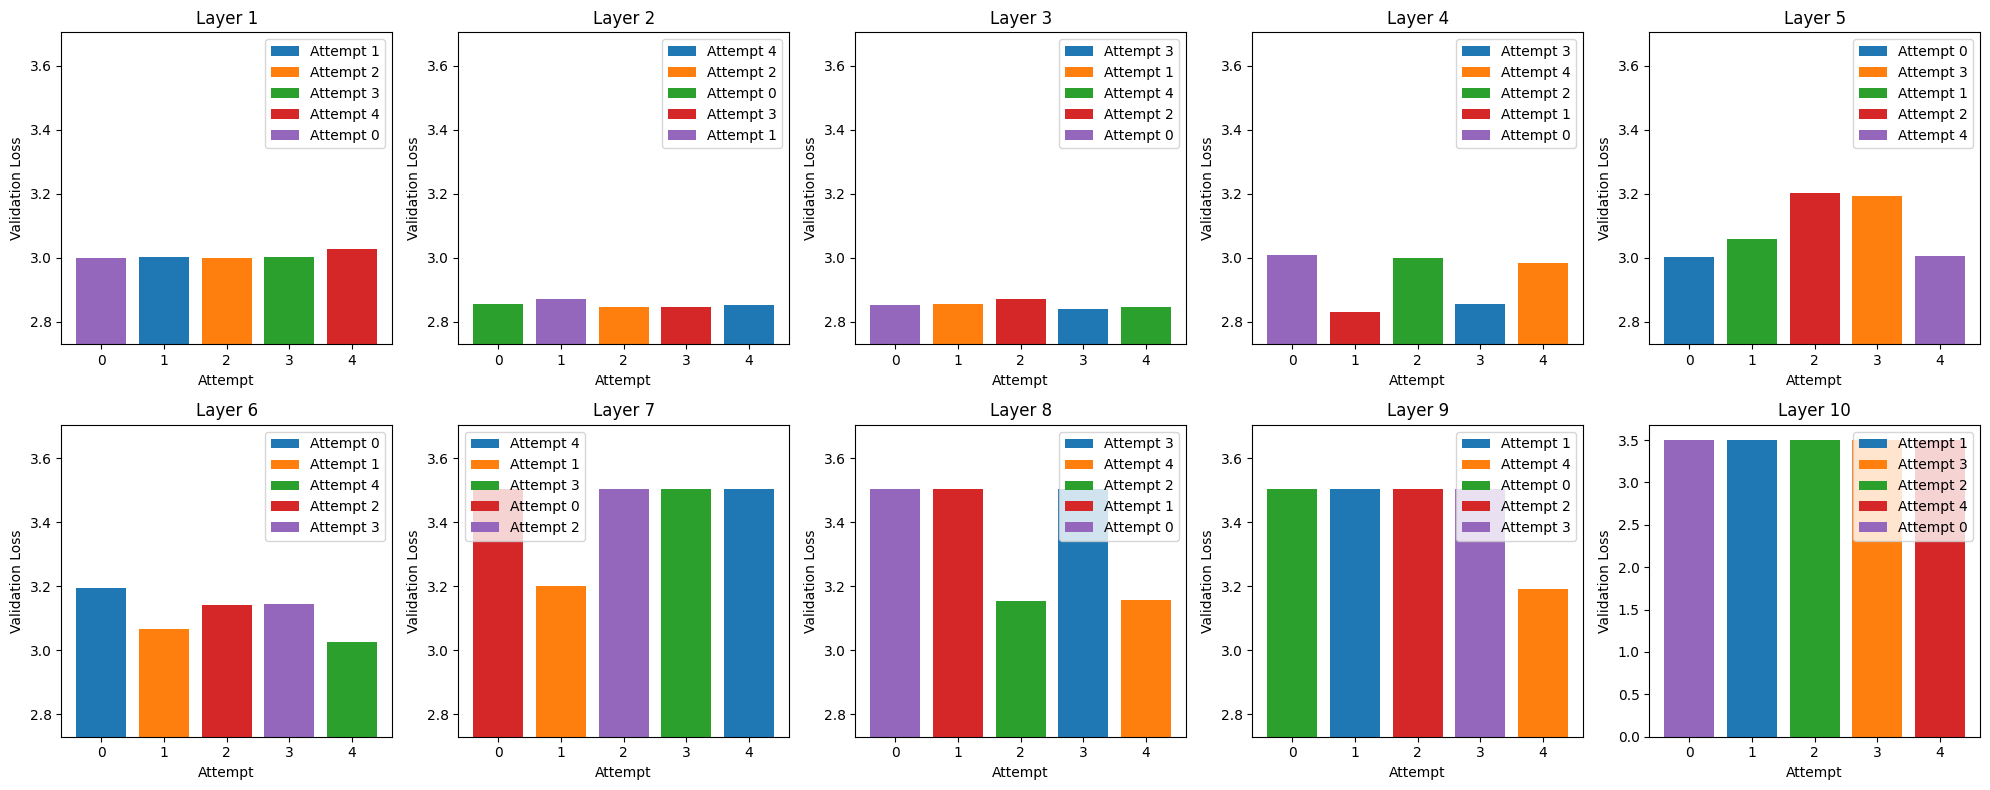

In [7]:
def bar_plot_validation_loss(dataset):
    # Convert column to object type to store sequences without error
    dataset = dataset.copy()
    dataset['validation_loss'] = dataset['validation_loss']

    # Process validation loss data
    validation_loss = dataset['validation_loss']
    for i in range(len(validation_loss)):
        validation_loss[i] = float(validation_loss[i])

    # Create list of layer, attempt, and loss data
    layer_attempt_pairs = []
    for i in range(len(validation_loss)):
        layer = dataset['layers'][i]
        attempt = dataset['atempt'][i]
        val_loss = validation_loss[i]
        layer_attempt_pairs.append((layer, attempt, val_loss))

    layer_attempt_pairs = list(set(layer_attempt_pairs))
    unique_layers = sorted(dataset['layers'].unique())

    # Setup subplots in 2 rows, 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # flatten 2D axes array to 1D for easier indexing

    for layer, attempt, val_loss in layer_attempt_pairs:
        layer_idx = unique_layers.index(layer)
        # Plot each row as a single bar
        axes[layer_idx].bar([attempt], [val_loss], label=f'Attempt {attempt}')

    for idx, (ax, layer) in enumerate(zip(axes, unique_layers)):
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('Attempt')
        ax.set_ylabel('Validation Loss')
        ax.legend()
        ax.set_ylim(min(validation_loss)-0.1, max(validation_loss) + 0.2)

    # Hide any unused subplots (in case there are fewer than 10 layers)
    for idx in range(len(unique_layers), len(axes)):
        fig.delaxes(axes[idx])
    plt.axis('tight')
    plt.tight_layout()
    plt.show()
bar_plot_validation_loss(dataset)

C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\390429899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalisation[i] = [float(x) for x in generalisation[i].replace('(', '').replace(')', '').split(',')]
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\390429899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalisation[i] = [float(x) for x in generalisation[i].replace('(', '').replace(')', '').split(',')]
C:\Users\thijn\AppData\Local\Temp\ipykernel_18348\390429899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

(0.984, 0.981, 0.202)
(0.999, 0.987, 0.039)
(0.971, 0.967, 0.252)
(0.992, 0.989, 0.23)
(0.981, 0.979, 0.223)
(0.0, 0.0, 0.0)
(0.991, 0.974, 0.281)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.445, 0.062, 0.0)
(0.985, 0.957, 0.035)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.993, 0.985, 0.231)
(0.0, 0.0, 0.0)
(0.99, 0.976, 0.049)
(0.997, 0.987, 0.013)
(0.957, 0.865, 0.005)
(0.995, 0.99, 0.047)
(0.995, 0.988, 0.024)
(0.982, 0.972, 0.229)
(0.979, 0.964, 0.294)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(1.0, 0.004, 0.0)
(1.0, 0.993, 0.005)
(0.99, 0.986, 0.262)
(0.998, 0.988, 0.044)
(0.0, 0.0, 0.0)
(0.998, 0.987, 0.039)
(0.0, 0.0, 0.0)
(0.941, 0.64, 0.001)
(0.964, 0.013, 0.0)
(0.0, 0.0, 0.0)
(0.996, 0.991, 0.035)
(0.994, 0.984, 0.035)
(0.0, 0.0, 0.0)
(0.995, 0.956, 0.001)
(0.981, 0.965, 0.033)
(0.967, 0.952, 0.285)
(0.996, 0.986, 0.07)
(0.999, 0.019, 0.0)
(0.996, 0.992, 0.019)
(0.0, 0.0, 0.0)
(0.992, 0.987, 0.316)
(0.985, 0.023, 0.0)
(0.996, 0.985, 0.272)
(0.0, 0.0, 0.0)


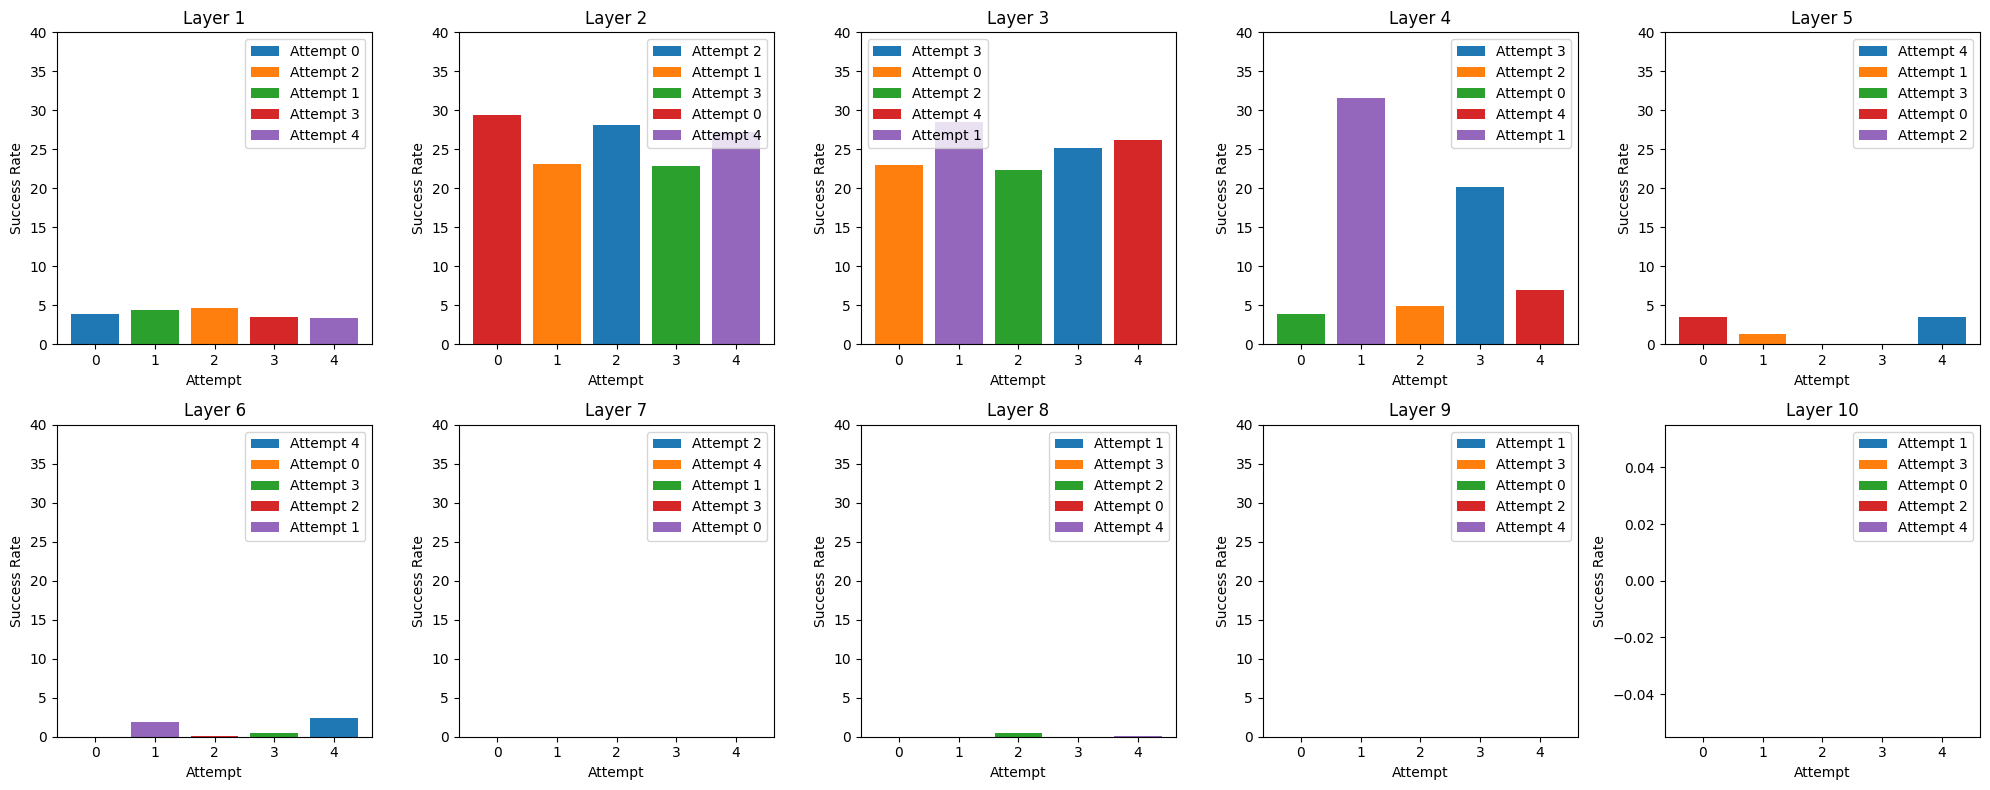

In [17]:
def plot_generalisationx2(dataset):
    # Convert column to object type to store sequences without error
    dataset = dataset.copy()
    dataset['validation_test'] = dataset['validation_test']

    # Process generalisation data
    generalisation = dataset['validation_test']
    for i in range(len(generalisation)):
        # Remove parentheses, split, then convert each value to float
        generalisation[i] = [float(x) for x in generalisation[i].replace('(', '').replace(')', '').split(',')]

    # Create list of layer, attempt, and loss data, converting list to tuple for hashing
    layer_attempt_pairs = []
    for i in range(len(generalisation)):
        layer = dataset['layers'][i]
        attempt = dataset['atempt'][i]
        gen_loss_tuple = tuple(generalisation[i])
        layer_attempt_pairs.append((layer, attempt, gen_loss_tuple))

    # Remove duplicates by converting to set
    layer_attempt_pairs = list(set(layer_attempt_pairs))
    unique_layers = sorted(dataset['layers'].unique())

    

    # Setup subplots in 2 rows, 5 columns
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()  # flatten 2D axes array to 1D for easier indexing
    
    for layer, attempt, gen_loss in layer_attempt_pairs:
        layer_idx = unique_layers.index(layer)
        # Use the sum of values in gen_loss to plot a single bar, or adjust as needed
        axes[layer_idx].bar([attempt], [gen_loss[2]*100], label=f'Attempt {attempt}')
        print(gen_loss)
    for idx, (ax, layer) in enumerate(zip(axes, unique_layers)):
        ax.set_title(f'Layer {layer}')
        ax.set_xlabel('Attempt')
        ax.set_ylabel('Success Rate')
        ax.legend()
        ax.set_ylim(0, 40)
        

    # Hide any unused subplots (in case there are fewer than 10 layers)
    for idx in range(len(unique_layers), len(axes)):
        fig.delaxes(axes[idx])
    plt.axis('tight')
    plt.tight_layout()
    plt.show()
plot_generalisationx2(dataset)

# de eerste waarde van de tuple is de ratio van syntactisch correcte formule, de tweede waarde is de syntactisch correct met correcte atoms, de derde waarde is een syntactische correcte formule met correcte atoms en correcte conclusie